# Lab 5 - Plotting
Tyler Bevan

Throughout the assignment I had to change a couple of things to conform to
the python 3.6 version of pandas.


## Unit 41

In [1]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
alco = pickle.load(open("alco.pickle", "rb"))
del alco["Total"]
columns, years = alco.unstack().columns.levels
states = pd.read_csv("states.csv",
                     names=("State", "Standard", "Postal", "Capital"))
states.set_index("State", inplace=True)

frames = [pd.merge(alco[column].unstack(), states,
                   left_index=True, right_index=True).sort_values(2009)
          for column in columns]

span = max(years) - min(years) + 1

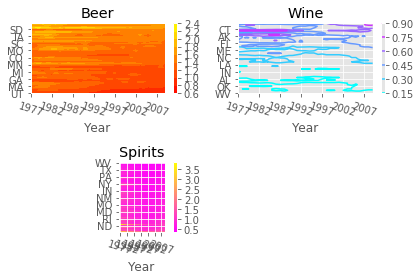

In [2]:
matplotlib.style.use("ggplot")

STEP = 5
for pos, (draw, style, column, frame) in enumerate(zip(
    (plt.contourf, plt.contour, plt.imshow),
    (plt.cm.autumn, plt.cm.cool, plt.cm.spring),
    columns, frames)):

    plt.subplot(2, 2, pos + 1)
    draw(frame[frame.columns[:span]], cmap=style)
    plt.colorbar()
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP])
    plt.yticks(range(0, frame.shape[0], STEP), frame.Postal[::STEP])
    plt.xticks(rotation=-17)
plt.tight_layout()
plt.savefig("./images/pyplot-all.pdf")

## Unit 43

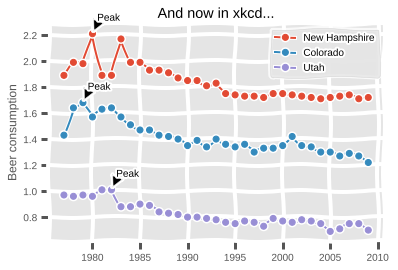

In [6]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))
# Select the right data
BEVERAGE = "Beer"
years = alco.index.levels[1]
years = sorted(years, reverse=True)
states = ("New Hampshire", "Colorado", "Utah")
# Select a good-looking style
plt.xkcd()
matplotlib.style.use("ggplot")
matplotlib.rc("font", family="Liberation Sans")
# Plot the charts
for state in states:
    ydata = alco.loc[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    # Add annotations with arrows
    plt.annotate(s="Peak", xy=(ydata.idxmax(), ydata.max()),
    xytext=(ydata.idxmax() + 0.5, ydata.max() + 0.1),
    arrowprops={"facecolor": "black", "shrink": 0.2})
# Add labels and legends
plt.ylabel(BEVERAGE + " consumption")
plt.title("And now in xkcd...")
plt.legend(states)
plt.savefig("./images/pyplot-legend-xkcd.pdf")

## Unit 44

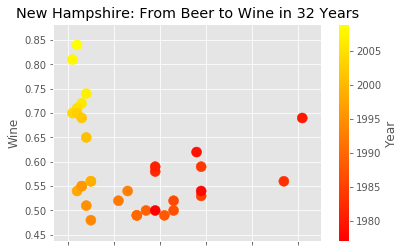

In [2]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))
# Select a good-locking style
matplotlib.style.use("ggplot")
# Do the scatter plot
STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
statedata.plot.scatter("Beer", "Wine", c="Year", s=100, cmap=plt.cm.autumn)
plt.title("%s: From Beer to Wine in 32 Years" % STATE)
plt.savefig("./images/scatter-plot.pdf")

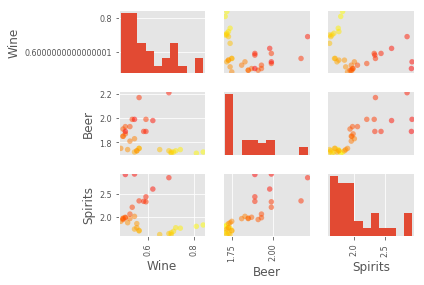

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))
# Select a good-locking style
matplotlib.style.use("ggplot")
# Plot the scatter matrix
STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
scatter_matrix(statedata[["Wine", "Beer", "Spirits"]],
               s=120, c=statedata["Year"], cmap=plt.cm.autumn)
plt.tight_layout()
plt.savefig("./images/scatter-matrix.pdf")

## American Pie
I got a csv of state names based on the provided website. I then used a map to get just the first letters.
I used a counter to get the stats on the names, then imported that data into pandas and rendered the pie chart.

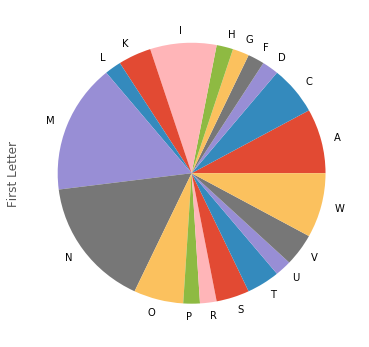

In [32]:
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
from collections import Counter
names = pd.read_csv("statenames.csv", header=None, names=["Name"])
first = names["Name"].map(lambda x: str(x).strip()[0])
count = Counter(first)
data = pd.DataFrame.from_dict(count, orient='index', columns=["First Letter"])
data["First Letter"].plot.pie(figsize=(6, 6))